In [30]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import mglearn

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Maigun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [31]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

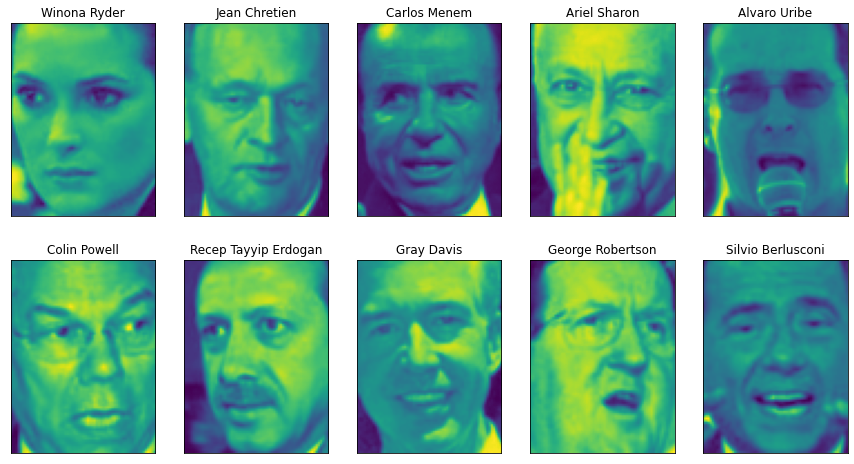

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks' :(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [33]:
print('people.image.shape:', people.images.shape)
print('클래스 개수: ', len(people.target_names))

people.image.shape: (3023, 87, 65)
클래스 개수:  62


In [34]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
x_people = people.data[mask]
y_people = people.target[mask]

#흑백 이미지는 0-255 픽셀값을 가짐
#스케일 조정 0-1 사이
x_people = x_people/255

In [35]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)

In [36]:
#모델 정의
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn.score(x_test, y_test)

0.2189922480620155

In [38]:
#차원축소
pca = PCA(n_components=50, whiten=True, random_state=0)
pca.fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [39]:
x_train_pca.shape

(1547, 50)

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca, y_train)
knn.score(x_test_pca, y_test)

0.26356589147286824

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


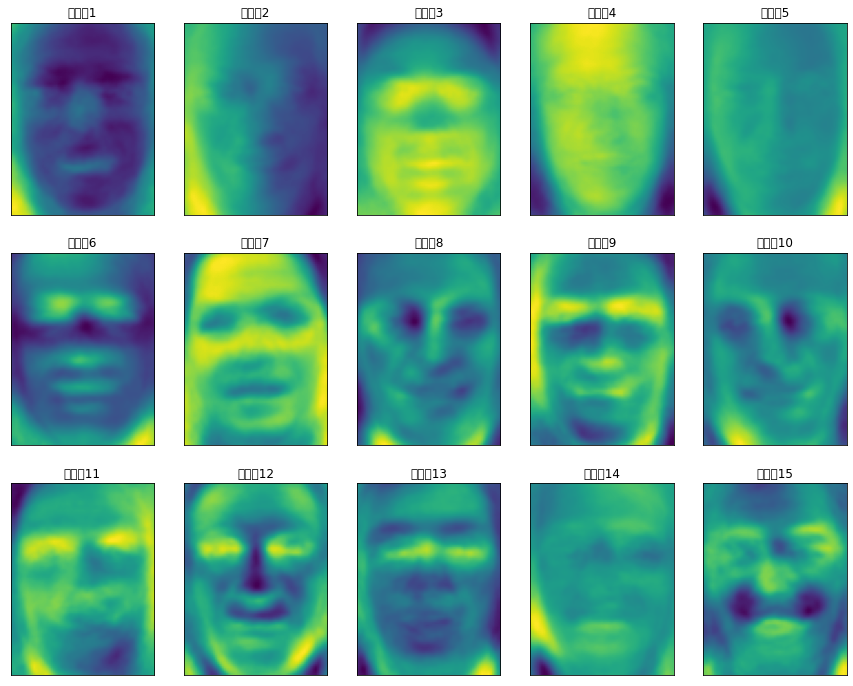

In [47]:
#주성분 뽑아보기?
fig, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분{}'.format((i+1)))